In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('taxi_fare.csv')

In [2]:
def haversine_km(lon1, lat1, lon2, lat2):
    """
    Calculate the Haversine distance (in kilometers) between two points.
    Works with Pandas Series (vectorized).
    """
    R = 6371  # Earth radius in kilometers

    lon1 = np.radians(lon1)
    lat1 = np.radians(lat1)
    lon2 = np.radians(lon2)
    lat2 = np.radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

In [3]:
data["trip_distance"] = haversine_km(
    data["pickup_longitude"],
    data["pickup_latitude"],
    data["dropoff_longitude"],
    data["dropoff_latitude"]
)

data["trip_distance"] = data["trip_distance"].round(3)

data[[
    "pickup_longitude", "pickup_latitude",
    "dropoff_longitude", "dropoff_latitude",
    "trip_distance"
]].head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_distance
0,-73.976746,40.765152,-74.004265,40.746128,3.138
1,-73.983482,40.767925,-74.005943,40.733166,4.303
2,-73.782021,40.644810,-73.974541,40.675770,16.600
3,-73.863419,40.769814,-73.969650,40.757767,9.047
4,-73.971741,40.792183,-74.177170,40.695053,20.400


In [4]:
data.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.138
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.303
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.600
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.047
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.400
5,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-74.017197,40.705383,1,N,-73.978073,40.755787,1,23.5,1.0,0.5,5.06,0.00,0.3,30.36,6.502
6,2,2016-03-01 00:00:00,2016-03-01 00:00:00,6,-73.994583,40.727848,1,N,0.000000,0.000000,2,23.0,0.5,0.5,0.00,0.00,0.3,24.30,8666.430
7,1,2016-03-01 00:00:01,2016-03-01 00:16:04,1,-73.788773,40.647758,1,N,-73.829208,40.712345,3,20.5,0.5,0.5,0.00,0.00,0.3,21.80,7.950
8,1,2016-03-01 00:00:01,2016-03-01 00:05:00,1,-73.958221,40.764641,1,N,-73.967896,40.762901,1,5.5,0.5,0.5,2.00,0.00,0.3,8.80,0.837
9,2,2016-03-01 00:00:01,2016-03-01 00:24:06,3,-73.985779,40.741192,1,N,-73.946350,40.797878,1,23.5,0.5,0.5,3.20,0.00,0.3,28.00,7.124


In [5]:
# Check for negative or zero distances
data["trip_distance"].describe()

count    212345.000000
mean         25.156607
std         435.567787
min           0.000000
25%           1.155000
50%           1.938000
75%           3.566000
max        8713.463000
Name: trip_distance, dtype: float64

In [6]:
# Ensure datetime parsing
data["tpep_pickup_datetime"] = pd.to_datetime(data["tpep_pickup_datetime"], errors="coerce")

# Treat as UTC then convert to EDT/EST properly (handles daylight saving automatically)
data["pickup_datetime_local"] = (
    data["tpep_pickup_datetime"]
      .dt.tz_localize("UTC", ambiguous="NaT", nonexistent="NaT")
      .dt.tz_convert("America/New_York")
)

In [7]:
data["pickup_day"] = np.where(
    data["pickup_datetime_local"].dt.dayofweek < 5,
    "weekday",
    "weekend"
)


In [8]:
data["am_pm"] = np.where(
    data["pickup_datetime_local"].dt.hour < 12,
    "AM",
    "PM"
)


In [9]:
hour = data["pickup_datetime_local"].dt.hour

data["is_night"] = np.where(
    (hour >= 20) | (hour < 6),
    1,
    0
).astype(int)


In [10]:
data[["tpep_pickup_datetime", "pickup_datetime_local", "pickup_day", "am_pm", "is_night"]].head(10)

,tpep_pickup_datetime,pickup_datetime_local,pickup_day,am_pm,is_night
0,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,weekday,PM,0
1,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,weekday,PM,0
2,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,weekday,PM,0
3,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,weekday,PM,0
4,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,weekday,PM,0
5,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,weekday,PM,0
6,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,weekday,PM,0
7,2016-03-01 00:00:01,2016-02-29 19:00:01-05:00,weekday,PM,0
8,2016-03-01 00:00:01,2016-02-29 19:00:01-05:00,weekday,PM,0
9,2016-03-01 00:00:01,2016-02-29 19:00:01-05:00,weekday,PM,0


In [11]:
data.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_datetime_local,pickup_day,am_pm,is_night
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.5,2.05,0.00,0.3,12.35,3.138,2016-02-29 19:00:00-05:00,weekday,PM,0
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.5,3.05,0.00,0.3,15.35,4.303,2016-02-29 19:00:00-05:00,weekday,PM,0
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.5,8.00,0.00,0.3,63.80,16.600,2016-02-29 19:00:00-05:00,weekday,PM,0
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0.5,3.78,5.54,0.3,41.62,9.047,2016-02-29 19:00:00-05:00,weekday,PM,0
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.0,0.00,15.50,0.3,113.80,20.400,2016-02-29 19:00:00-05:00,weekday,PM,0
5,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-74.017197,40.705383,1,N,-73.978073,40.755787,...,0.5,5.06,0.00,0.3,30.36,6.502,2016-02-29 19:00:00-05:00,weekday,PM,0
6,2,2016-03-01 00:00:00,2016-03-01 00:00:00,6,-73.994583,40.727848,1,N,0.000000,0.000000,...,0.5,0.00,0.00,0.3,24.30,8666.430,2016-02-29 19:00:00-05:00,weekday,PM,0
7,1,2016-03-01 00:00:01,2016-03-01 00:16:04,1,-73.788773,40.647758,1,N,-73.829208,40.712345,...,0.5,0.00,0.00,0.3,21.80,7.950,2016-02-29 19:00:01-05:00,weekday,PM,0
8,1,2016-03-01 00:00:01,2016-03-01 00:05:00,1,-73.958221,40.764641,1,N,-73.967896,40.762901,...,0.5,2.00,0.00,0.3,8.80,0.837,2016-02-29 19:00:01-05:00,weekday,PM,0
9,2,2016-03-01 00:00:01,2016-03-01 00:24:06,3,-73.985779,40.741192,1,N,-73.946350,40.797878,...,0.5,3.20,0.00,0.3,28.00,7.124,2016-02-29 19:00:01-05:00,weekday,PM,0


In [12]:
data["pickup_day_name"] = data["pickup_datetime_local"].dt.day_name()

In [13]:
data.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_datetime_local,pickup_day,am_pm,is_night,pickup_day_name
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,2.05,0.00,0.3,12.35,3.138,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,3.05,0.00,0.3,15.35,4.303,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,8.00,0.00,0.3,63.80,16.600,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,3.78,5.54,0.3,41.62,9.047,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.00,15.50,0.3,113.80,20.400,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
5,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-74.017197,40.705383,1,N,-73.978073,40.755787,...,5.06,0.00,0.3,30.36,6.502,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
6,2,2016-03-01 00:00:00,2016-03-01 00:00:00,6,-73.994583,40.727848,1,N,0.000000,0.000000,...,0.00,0.00,0.3,24.30,8666.430,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
7,1,2016-03-01 00:00:01,2016-03-01 00:16:04,1,-73.788773,40.647758,1,N,-73.829208,40.712345,...,0.00,0.00,0.3,21.80,7.950,2016-02-29 19:00:01-05:00,weekday,PM,0,Monday
8,1,2016-03-01 00:00:01,2016-03-01 00:05:00,1,-73.958221,40.764641,1,N,-73.967896,40.762901,...,2.00,0.00,0.3,8.80,0.837,2016-02-29 19:00:01-05:00,weekday,PM,0,Monday
9,2,2016-03-01 00:00:01,2016-03-01 00:24:06,3,-73.985779,40.741192,1,N,-73.946350,40.797878,...,3.20,0.00,0.3,28.00,7.124,2016-02-29 19:00:01-05:00,weekday,PM,0,Monday


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype                           
---  ------                 --------------   -----                           
 0   VendorID               212345 non-null  int64                           
 1   tpep_pickup_datetime   212345 non-null  datetime64[ns]                  
 2   tpep_dropoff_datetime  212345 non-null  object                          
 3   passenger_count        212345 non-null  int64                           
 4   pickup_longitude       212345 non-null  float64                         
 5   pickup_latitude        212345 non-null  float64                         
 6   RatecodeID             212345 non-null  int64                           
 7   store_and_fwd_flag     212345 non-null  object                          
 8   dropoff_longitude      212345 non-null  float64                         
 9   dropoff_latitude       212

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure these are numeric
for col in ["trip_distance", "fare_amount"]:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Basic cleanup (remove nulls and non-positive values)
df_clean = data.dropna(subset=["trip_distance", "fare_amount"])
df_clean = df_clean[(df_clean["trip_distance"] > 0) & (df_clean["fare_amount"] > 0)]

df_clean[["trip_distance","fare_amount"]].describe()

,trip_distance,fare_amount
count,209204.000000,209204.000000
mean,24.912341,12.659093
std,432.677139,10.698707
min,0.001000,0.010000
25%,1.184000,6.500000
50%,1.968000,9.500000
75%,3.609000,14.500000
max,8713.463000,819.500000


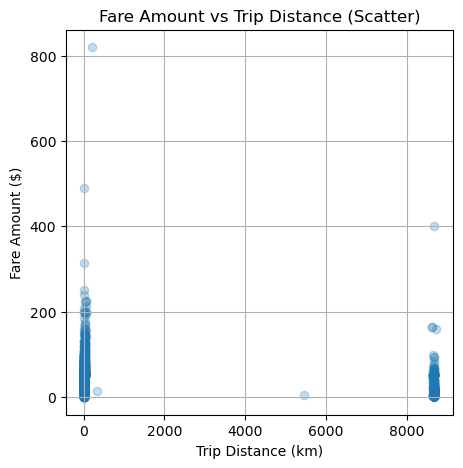

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(df_clean["trip_distance"], df_clean["fare_amount"], alpha=0.25)
plt.title("Fare Amount vs Trip Distance (Scatter)")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

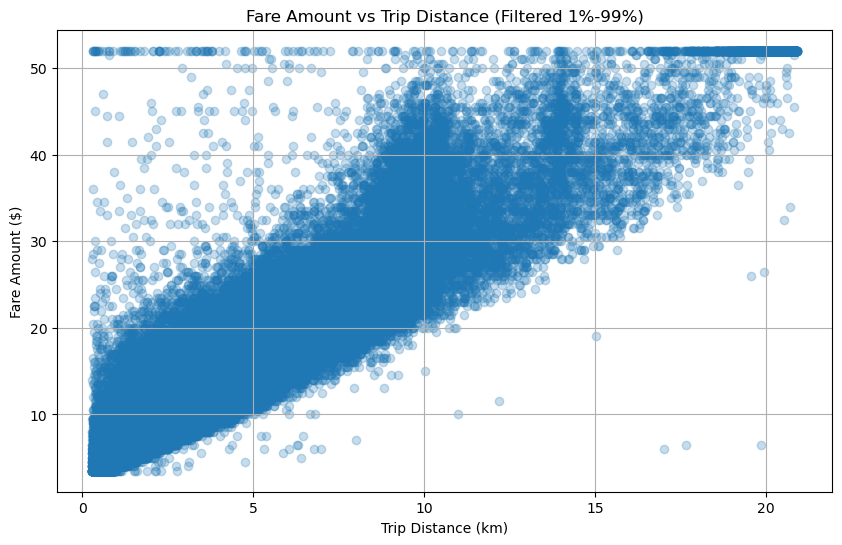

In [17]:
d_low, d_high = df_clean["trip_distance"].quantile([0.01, 0.99])
f_low, f_high = df_clean["fare_amount"].quantile([0.01, 0.99])

df_filt = df_clean[
    df_clean["trip_distance"].between(d_low, d_high) &
    df_clean["fare_amount"].between(f_low, f_high)
]

plt.figure(figsize=(10,6))
plt.scatter(df_filt["trip_distance"], df_filt["fare_amount"], alpha=0.25)
plt.title("Fare Amount vs Trip Distance (Filtered 1%-99%)")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

C:\Users\KALKI PRATHISHA\AppData\Local\Temp\ipykernel_1912\636986741.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filt.groupby("distance_bin")["fare_amount"]


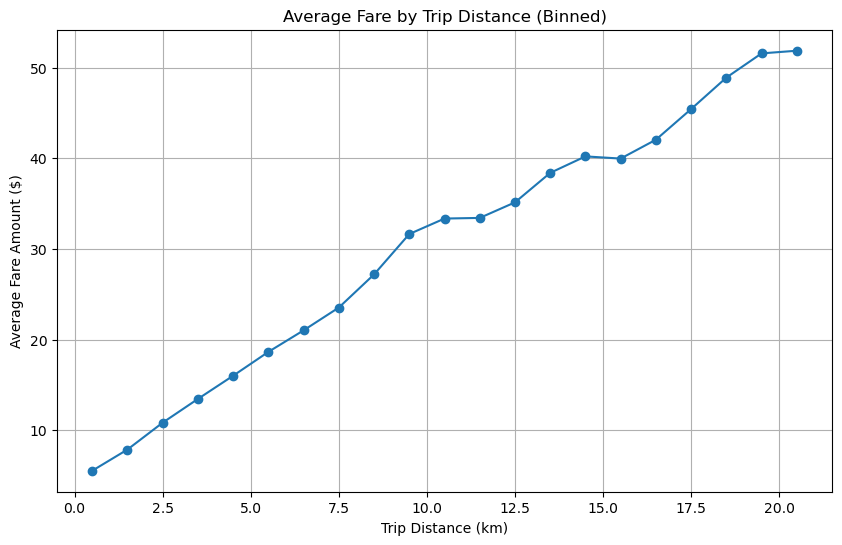

In [18]:
# Bin distance into 1 km buckets (you can change to 0.5 if needed)
bin_size_km = 1
max_d = df_filt["trip_distance"].max()
bins = np.arange(0, max_d + bin_size_km, bin_size_km)

df_filt = df_filt.copy()
df_filt["distance_bin"] = pd.cut(df_filt["trip_distance"], bins=bins)

avg_fare = (
    df_filt.groupby("distance_bin")["fare_amount"]
    .mean()
    .reset_index()
)

avg_fare["bin_mid"] = avg_fare["distance_bin"].apply(lambda x: x.mid)

plt.figure(figsize=(10,6))
plt.plot(avg_fare["bin_mid"], avg_fare["fare_amount"], marker="o")
plt.title("Average Fare by Trip Distance (Binned)")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Average Fare Amount ($)")
plt.grid(True)
plt.show()

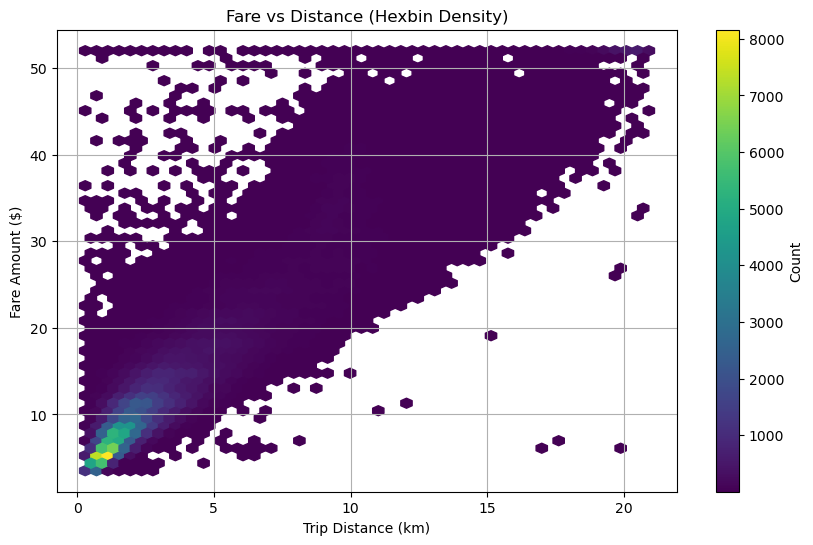

In [19]:
plt.figure(figsize=(10,6))
plt.hexbin(df_filt["trip_distance"], df_filt["fare_amount"], gridsize=50, mincnt=1)
plt.title("Fare vs Distance (Hexbin Density)")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.colorbar(label="Count")
plt.show()

In [20]:
# Ensure numeric
data["fare_amount"] = pd.to_numeric(data["fare_amount"], errors="coerce")
data["passenger_count"] = pd.to_numeric(data["passenger_count"], errors="coerce")

# Keep valid rows
df_pc = data.dropna(subset=["fare_amount", "passenger_count"])
df_pc = df_pc[(df_pc["fare_amount"] > 0) & (df_pc["passenger_count"] > 0)]

# Optional: cap passenger count to typical taxi range (1–6)
df_pc = df_pc[df_pc["passenger_count"].between(1, 6)]

In [21]:
avg_fare_pc = (
    df_pc
    .groupby("passenger_count")["fare_amount"]
    .mean()
    .reset_index()
)
avg_fare_pc


,passenger_count,fare_amount
0,1,12.564334
1,2,13.197737
2,3,12.893430
3,4,12.660848
4,5,12.892423
5,6,12.508575


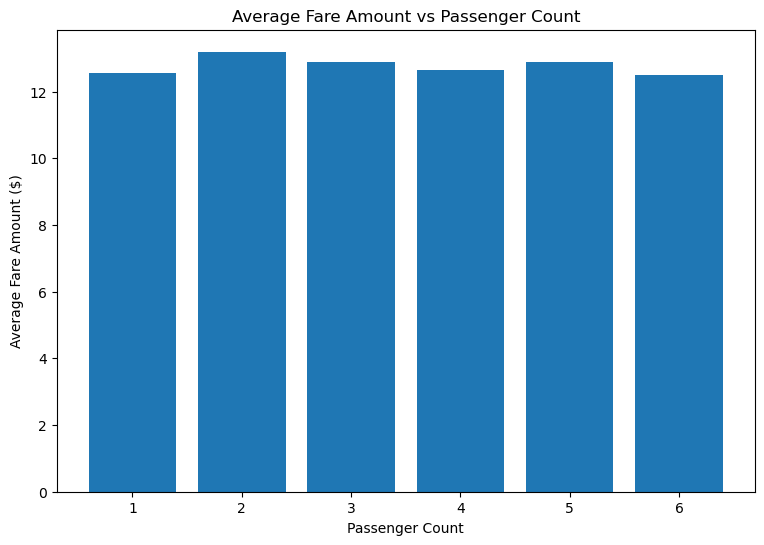

In [22]:
plt.figure(figsize=(9,6))
plt.bar(
    avg_fare_pc["passenger_count"].astype(str),
    avg_fare_pc["fare_amount"]
)

plt.title("Average Fare Amount vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare Amount ($)")
plt.show()

Text(0, 0.5, 'Trip Count')

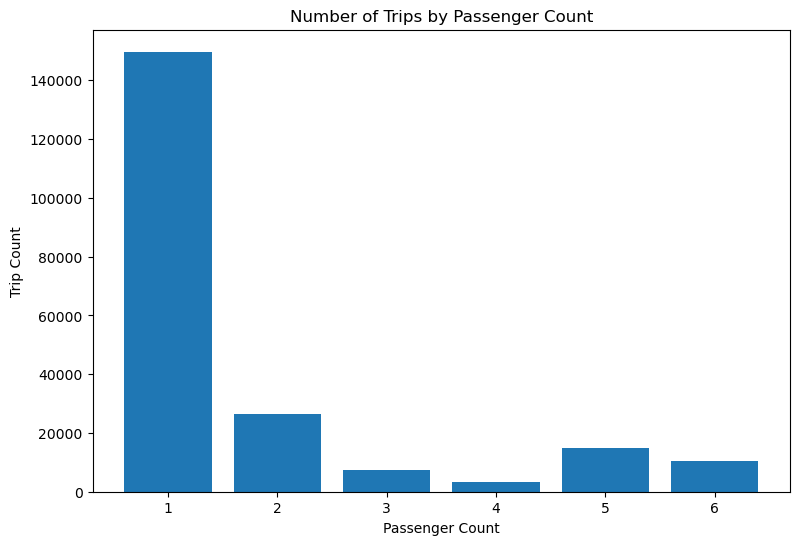

In [23]:
pc_trip_counts = df_pc["passenger_count"].value_counts().sort_index()

plt.figure(figsize=(9,6))
plt.bar(pc_trip_counts.index.astype(str), pc_trip_counts.values)
plt.title("Number of Trips by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Trip Count")


In [24]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_datetime_local,pickup_day,am_pm,is_night,pickup_day_name
0,1,2016-03-01,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,2.05,0.00,0.3,12.35,3.138,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
1,1,2016-03-01,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,3.05,0.00,0.3,15.35,4.303,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
2,2,2016-03-01,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,8.00,0.00,0.3,63.80,16.600,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
3,2,2016-03-01,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,3.78,5.54,0.3,41.62,9.047,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
4,2,2016-03-01,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.00,15.50,0.3,113.80,20.400,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype                           
---  ------                 --------------   -----                           
 0   VendorID               212345 non-null  int64                           
 1   tpep_pickup_datetime   212345 non-null  datetime64[ns]                  
 2   tpep_dropoff_datetime  212345 non-null  object                          
 3   passenger_count        212345 non-null  int64                           
 4   pickup_longitude       212345 non-null  float64                         
 5   pickup_latitude        212345 non-null  float64                         
 6   RatecodeID             212345 non-null  int64                           
 7   store_and_fwd_flag     212345 non-null  object                          
 8   dropoff_longitude      212345 non-null  float64                         
 9   dropoff_latitude       212

In [26]:
data[[
    "tpep_pickup_datetime",
    "pickup_datetime_local",
    "pickup_day",
    "am_pm",
    "is_night",
    "pickup_day_name"
]].head(10)


,tpep_pickup_datetime,pickup_datetime_local,pickup_day,am_pm,is_night,pickup_day_name
0,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
1,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
2,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
3,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
4,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
5,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
6,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,weekday,PM,0,Monday
7,2016-03-01 00:00:01,2016-02-29 19:00:01-05:00,weekday,PM,0,Monday
8,2016-03-01 00:00:01,2016-02-29 19:00:01-05:00,weekday,PM,0,Monday
9,2016-03-01 00:00:01,2016-02-29 19:00:01-05:00,weekday,PM,0,Monday


In [27]:
hour = data["pickup_datetime_local"].dt.hour

data["is_night"] = np.where(
    (hour >= 19) | (hour < 6),
    1, 0
).astype(int)


In [28]:
data["tpep_pickup_datetime"] = pd.to_datetime(data["tpep_pickup_datetime"], errors="coerce")


In [29]:
data["tpep_dropoff_datetime"] = pd.to_datetime(data["tpep_dropoff_datetime"], errors="coerce")

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype                           
---  ------                 --------------   -----                           
 0   VendorID               212345 non-null  int64                           
 1   tpep_pickup_datetime   212345 non-null  datetime64[ns]                  
 2   tpep_dropoff_datetime  212345 non-null  datetime64[ns]                  
 3   passenger_count        212345 non-null  int64                           
 4   pickup_longitude       212345 non-null  float64                         
 5   pickup_latitude        212345 non-null  float64                         
 6   RatecodeID             212345 non-null  int64                           
 7   store_and_fwd_flag     212345 non-null  object                          
 8   dropoff_longitude      212345 non-null  float64                         
 9   dropoff_latitude       212

In [31]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_datetime_local,pickup_day,am_pm,is_night,pickup_day_name
0,1,2016-03-01,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,2.05,0.00,0.3,12.35,3.138,2016-02-29 19:00:00-05:00,weekday,PM,1,Monday
1,1,2016-03-01,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,3.05,0.00,0.3,15.35,4.303,2016-02-29 19:00:00-05:00,weekday,PM,1,Monday
2,2,2016-03-01,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,8.00,0.00,0.3,63.80,16.600,2016-02-29 19:00:00-05:00,weekday,PM,1,Monday
3,2,2016-03-01,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,3.78,5.54,0.3,41.62,9.047,2016-02-29 19:00:00-05:00,weekday,PM,1,Monday
4,2,2016-03-01,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.00,15.50,0.3,113.80,20.400,2016-02-29 19:00:00-05:00,weekday,PM,1,Monday


C:\Users\KALKI PRATHISHA\AppData\Local\Temp\ipykernel_1912\501780496.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


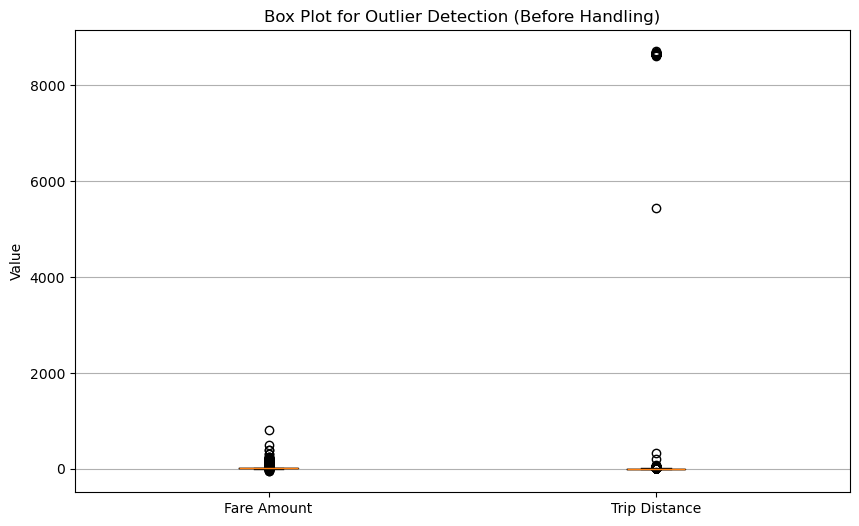

In [32]:
import matplotlib.pyplot as plt

cols = ["fare_amount", "trip_distance"]

plt.figure(figsize=(10,6))
plt.boxplot(
    [data[c].dropna() for c in cols],
    labels=["Fare Amount", "Trip Distance"],
    showfliers=True
)

plt.title("Box Plot for Outlier Detection (Before Handling)")
plt.ylabel("Value")
plt.grid(True, axis="y")
plt.show()


In [33]:
### Handing Outliers using IQR Method : 

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply IQR filtering
data_iqr = data.copy()
for col in ["fare_amount", "trip_distance"]:
    data_iqr = remove_outliers_iqr(data_iqr, col)


C:\Users\KALKI PRATHISHA\AppData\Local\Temp\ipykernel_1912\320549044.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


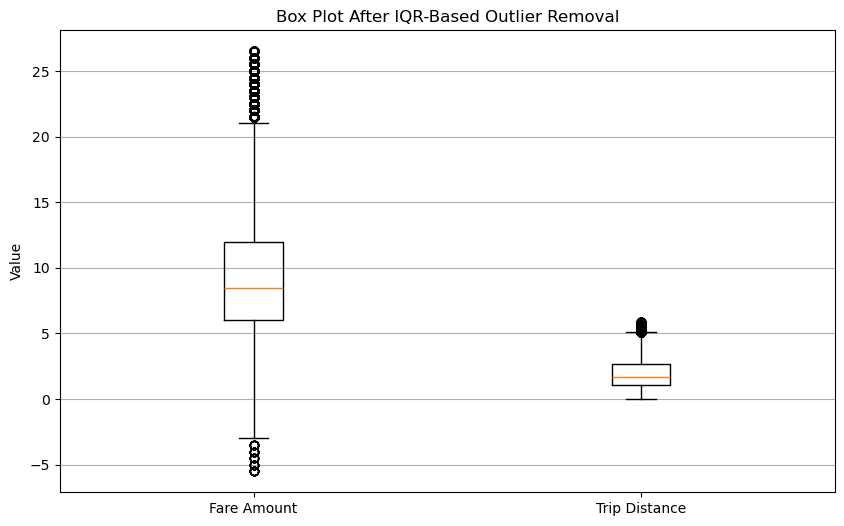

In [34]:
plt.figure(figsize=(10,6))
plt.boxplot(
    [data_iqr[c].dropna() for c in cols],
    labels=["Fare Amount", "Trip Distance"],
    showfliers=True
)

plt.title("Box Plot After IQR-Based Outlier Removal")
plt.ylabel("Value")
plt.grid(True, axis="y")
plt.show()


In [35]:
# Add month column from local pickup time
data["pickup_month"] = data["pickup_datetime_local"].dt.month


In [36]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_datetime_local,pickup_day,am_pm,is_night,pickup_day_name,pickup_month
0,1,2016-03-01,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.00,0.3,12.35,3.138,2016-02-29 19:00:00-05:00,weekday,PM,1,Monday,2
1,1,2016-03-01,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.00,0.3,15.35,4.303,2016-02-29 19:00:00-05:00,weekday,PM,1,Monday,2
2,2,2016-03-01,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.00,0.3,63.80,16.600,2016-02-29 19:00:00-05:00,weekday,PM,1,Monday,2
3,2,2016-03-01,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,5.54,0.3,41.62,9.047,2016-02-29 19:00:00-05:00,weekday,PM,1,Monday,2
4,2,2016-03-01,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,15.50,0.3,113.80,20.400,2016-02-29 19:00:00-05:00,weekday,PM,1,Monday,2


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype                           
---  ------                 --------------   -----                           
 0   VendorID               212345 non-null  int64                           
 1   tpep_pickup_datetime   212345 non-null  datetime64[ns]                  
 2   tpep_dropoff_datetime  212345 non-null  datetime64[ns]                  
 3   passenger_count        212345 non-null  int64                           
 4   pickup_longitude       212345 non-null  float64                         
 5   pickup_latitude        212345 non-null  float64                         
 6   RatecodeID             212345 non-null  int64                           
 7   store_and_fwd_flag     212345 non-null  object                          
 8   dropoff_longitude      212345 non-null  float64                         
 9   dropoff_latitude       212

Fare variation by time of day (hour)

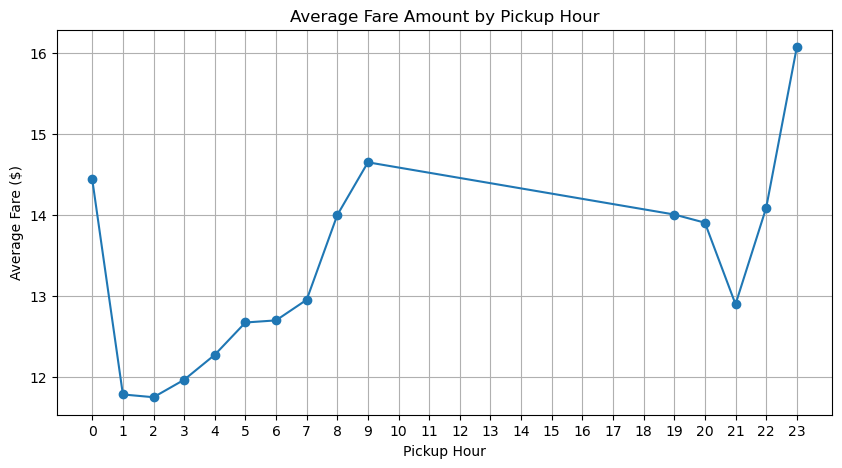

In [38]:
data["pickup_hour"] = data["pickup_datetime_local"].dt.hour  # if not already created

avg_fare_hour = data.groupby("pickup_hour")["fare_amount"].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_fare_hour.index, avg_fare_hour.values, marker="o")
plt.title("Average Fare Amount by Pickup Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Fare ($)")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

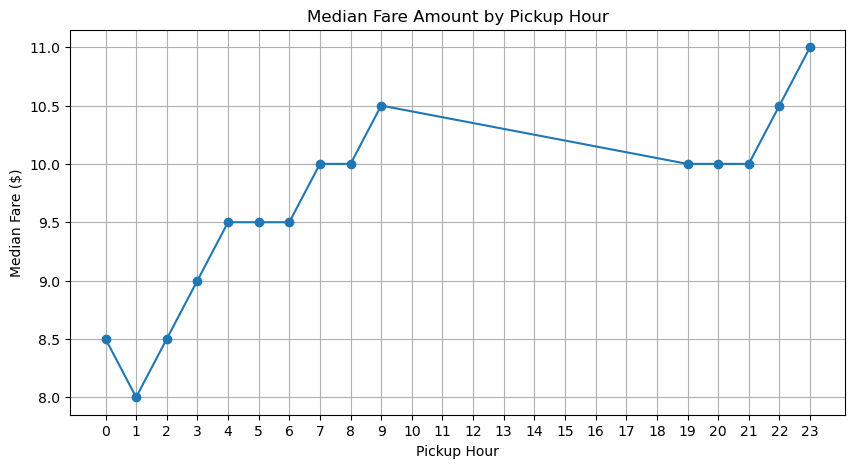

In [39]:
median_fare_hour = data.groupby("pickup_hour")["fare_amount"].median()

plt.figure(figsize=(10,5))
plt.plot(median_fare_hour.index, median_fare_hour.values, marker="o")
plt.title("Median Fare Amount by Pickup Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Median Fare ($)")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

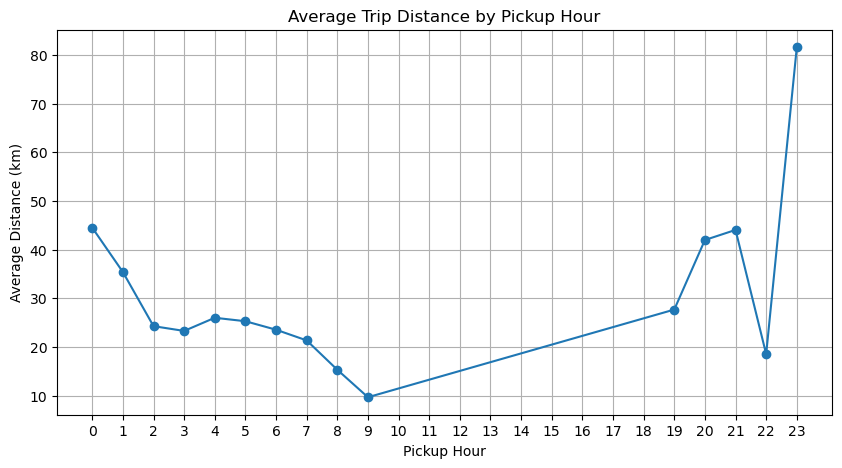

In [40]:
avg_dist_hour = data.groupby("pickup_hour")["trip_distance"].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_dist_hour.index, avg_dist_hour.values, marker="o")
plt.title("Average Trip Distance by Pickup Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Average Distance (km)")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


Fare variation: weekday vs weekend #Only weekday avaliable in the dataset

In [41]:
data["pickup_day"].value_counts()

pickup_day
weekday    212345
Name: count, dtype: int64

Fare variation across months

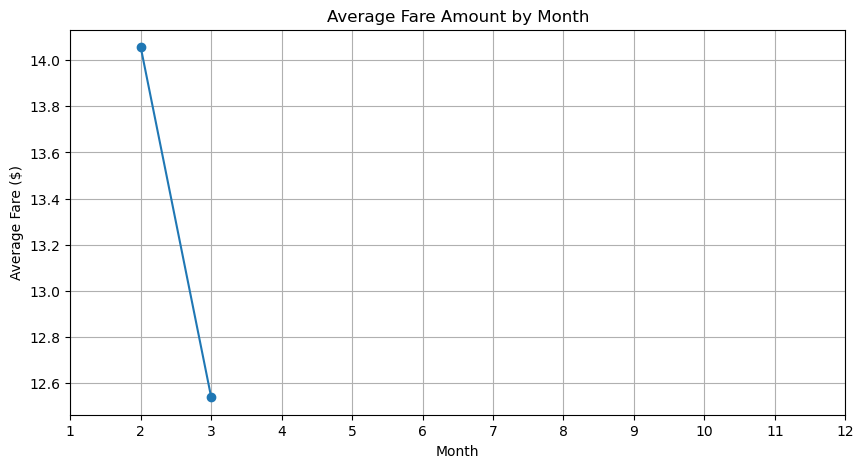

In [42]:
avg_fare_month = data.groupby("pickup_month")["fare_amount"].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_fare_month.index, avg_fare_month.values, marker="o")
plt.title("Average Fare Amount by Month")
plt.xlabel("Month")
plt.ylabel("Average Fare ($)")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

In [43]:
data["tpep_pickup_datetime"] = pd.to_datetime(
    data["tpep_pickup_datetime"], errors="coerce"
)

data["tpep_dropoff_datetime"] = pd.to_datetime(
    data["tpep_dropoff_datetime"], errors="coerce"
)

In [44]:
# Pickup local time (UTC → New York)
if "pickup_datetime_local" not in data.columns:
    data["pickup_datetime_local"] = (
        data["tpep_pickup_datetime"]
          .dt.tz_localize("UTC", ambiguous="NaT", nonexistent="NaT")
          .dt.tz_convert("America/New_York")
    )

# Dropoff local time
if "dropoff_datetime_local" not in data.columns:
    data["dropoff_datetime_local"] = (
        data["tpep_dropoff_datetime"]
          .dt.tz_localize("UTC", ambiguous="NaT", nonexistent="NaT")
          .dt.tz_convert("America/New_York")
    )


In [45]:
data["trip_duration_min"] = (
    (data["dropoff_datetime_local"] - data["pickup_datetime_local"])
        .dt.total_seconds() / 60
)


In [46]:
# Remove negative or unrealistically long trips
data.loc[
    (data["trip_duration_min"] <= 0) | (data["trip_duration_min"] > 300),
    "trip_duration_min"
] = np.nan


In [47]:
data[[
    "tpep_pickup_datetime",
    "tpep_dropoff_datetime",
    "pickup_datetime_local",
    "dropoff_datetime_local",
    "trip_duration_min"
]].head()


,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_datetime_local,dropoff_datetime_local,trip_duration_min
0,2016-03-01,2016-03-01 00:07:55,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,7.916667
1,2016-03-01,2016-03-01 00:11:06,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,11.100000
2,2016-03-01,2016-03-01 00:31:06,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,31.100000
3,2016-03-01,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,NaN
4,2016-03-01,2016-03-01 00:00:00,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,NaN


In [48]:
data.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,trip_distance,pickup_datetime_local,pickup_day,am_pm,is_night,pickup_day_name,pickup_month,pickup_hour,dropoff_datetime_local,trip_duration_min
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,...,3.806,2016-03-01 07:15:37-05:00,weekday,AM,0,Tuesday,3,7,2016-03-01 07:38:53-05:00,23.266667
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,...,3.497,2016-03-01 07:15:37-05:00,weekday,AM,0,Tuesday,3,7,2016-03-01 07:38:22-05:00,22.750000
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,...,0.580,2016-03-01 07:15:37-05:00,weekday,AM,0,Tuesday,3,7,2016-03-01 07:18:18-05:00,2.683333
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,...,1.556,2016-03-01 07:15:38-05:00,weekday,AM,0,Tuesday,3,7,2016-03-01 07:22:47-05:00,7.150000
212344,1,2016-03-01 12:15:38,2016-03-01 12:34:59,1,-73.988770,40.712662,1,N,-73.944550,40.782276,...,8.590,2016-03-01 07:15:38-05:00,weekday,AM,0,Tuesday,3,7,2016-03-01 07:34:59-05:00,19.350000


In [49]:
# Drop rows with NaN in trip_duration_min
data = data.dropna(subset=["trip_duration_min"])

In [50]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,trip_distance,pickup_datetime_local,pickup_day,am_pm,is_night,pickup_day_name,pickup_month,pickup_hour,dropoff_datetime_local,trip_duration_min
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,3.138,2016-02-29 19:00:00-05:00,weekday,PM,1,Monday,2,19,2016-02-29 19:07:55-05:00,7.916667
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,4.303,2016-02-29 19:00:00-05:00,weekday,PM,1,Monday,2,19,2016-02-29 19:11:06-05:00,11.100000
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,16.600,2016-02-29 19:00:00-05:00,weekday,PM,1,Monday,2,19,2016-02-29 19:31:06-05:00,31.100000
7,1,2016-03-01 00:00:01,2016-03-01 00:16:04,1,-73.788773,40.647758,1,N,-73.829208,40.712345,...,7.950,2016-02-29 19:00:01-05:00,weekday,PM,1,Monday,2,19,2016-02-29 19:16:04-05:00,16.050000
8,1,2016-03-01 00:00:01,2016-03-01 00:05:00,1,-73.958221,40.764641,1,N,-73.967896,40.762901,...,0.837,2016-02-29 19:00:01-05:00,weekday,PM,1,Monday,2,19,2016-02-29 19:05:00-05:00,4.983333


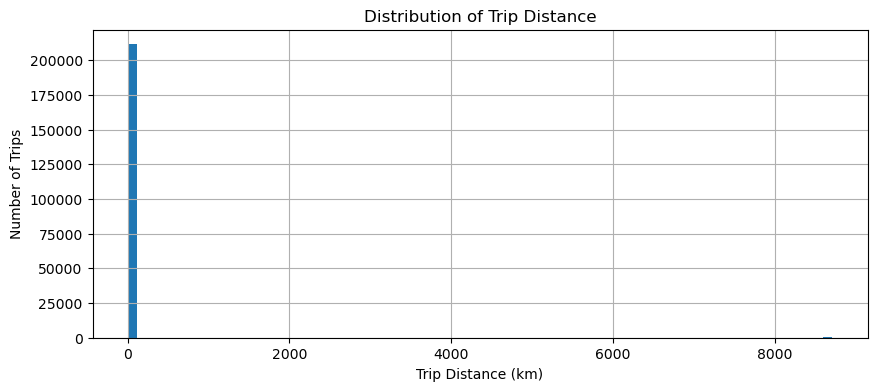

In [51]:
plt.figure(figsize=(10,4))
plt.hist(data["trip_distance"], bins=80)
plt.title("Distribution of Trip Distance")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.show()

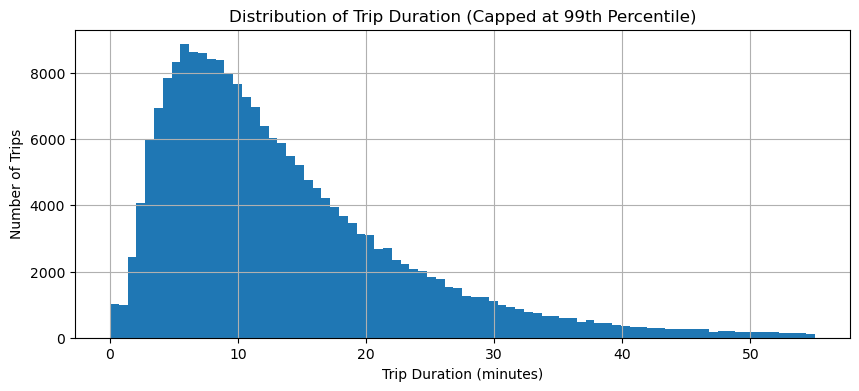

In [52]:
dur_cap = data["trip_duration_min"].quantile(0.99)

plt.figure(figsize=(10,4))
plt.hist(
    data[data["trip_duration_min"] <= dur_cap]["trip_duration_min"],
    bins=80
)
plt.title("Distribution of Trip Duration (Capped at 99th Percentile)")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.show()

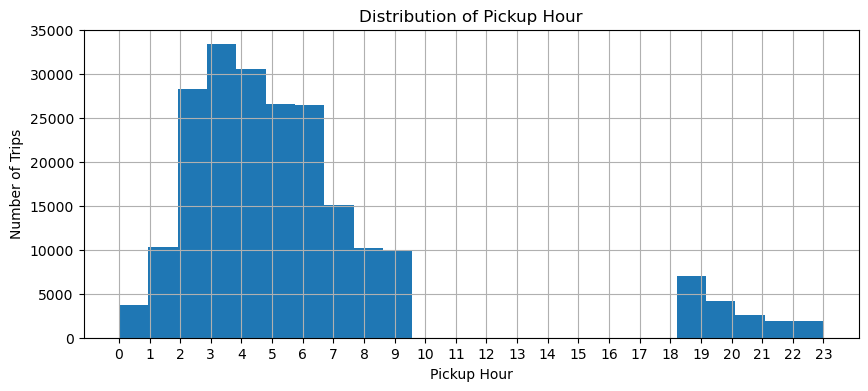

In [53]:
plt.figure(figsize=(10,4))
plt.hist(data["pickup_hour"], bins=24)
plt.title("Distribution of Pickup Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Number of Trips")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

Trip distance and trip duration distributions are highly right-skewed, with most trips being short and a small number of extreme values. To enable meaningful visualization, values were capped at the 99th percentile. Pickup hour distribution reveals clear demand patterns, with higher trip volumes during commute and evening hours.

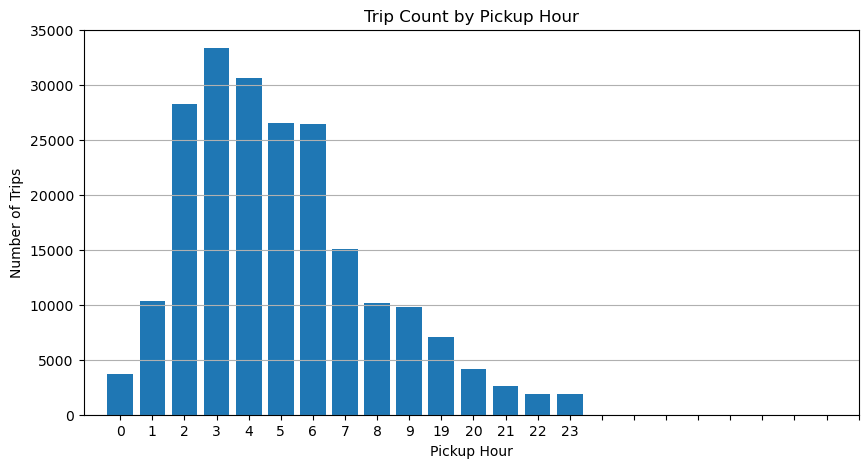

In [54]:

trip_count_hour = data["pickup_hour"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(trip_count_hour.index.astype(str), trip_count_hour.values)
plt.title("Trip Count by Pickup Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Number of Trips")
plt.xticks(range(0,24))
plt.grid(True, axis="y")
plt.show()


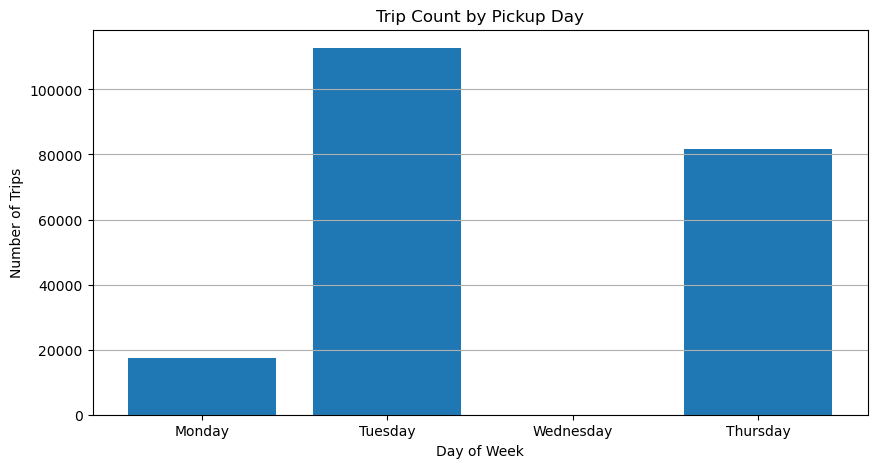

In [55]:
days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
trip_count_day = data["pickup_day_name"].value_counts().reindex(days_order)

plt.figure(figsize=(10,5))
plt.bar(trip_count_day.index, trip_count_day.values)
plt.title("Trip Count by Pickup Day")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.grid(True, axis="y")
plt.show()


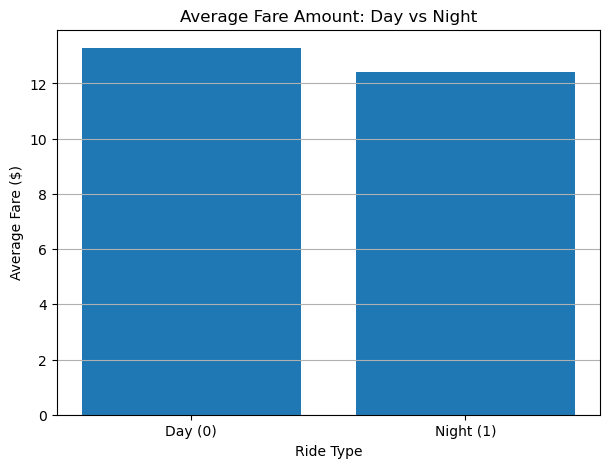

In [56]:


avg_fare_night = data.groupby("is_night")["fare_amount"].mean().reindex([0, 1])

plt.figure(figsize=(7,5))
plt.bar(["Day (0)", "Night (1)"], avg_fare_night.values)
plt.title("Average Fare Amount: Day vs Night")
plt.xlabel("Ride Type")
plt.ylabel("Average Fare ($)")
plt.grid(True, axis="y")
plt.show()


Data Tranformation : 

In [57]:
from scipy.stats import zscore

z_cols = ["fare_amount", "trip_distance", "trip_duration_min"]

z_scores = data[z_cols].apply(zscore)

# Mark rows where any feature has |z| > 3
outlier_mask = (z_scores.abs() > 3).any(axis=1)

print("Z-score detected outliers:", outlier_mask.sum())

# Remove them
data_z = data[~outlier_mask].copy()

Z-score detected outliers: 7563


In [58]:
data[z_cols].skew()

fare_amount           6.006267
trip_distance        22.240092
trip_duration_min     2.370711
dtype: float64

In [59]:
import numpy as np

skew_cols = ["fare_amount", "trip_distance", "trip_duration_min"]

for col in skew_cols:
    data[f"log_{col}"] = np.log1p(data[col])


D:\Anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [60]:
data[[f"log_{c}" for c in skew_cols]].skew()

log_fare_amount          0.797051
log_trip_distance        3.241060
log_trip_duration_min   -0.127628
dtype: float64

In [61]:
cat_cols = ["VendorID", "RatecodeID", "payment_type", "store_and_fwd_flag", "pickup_day", "am_pm"]
data_encoded = pd.get_dummies(
    data,
    columns=cat_cols,
    drop_first=True
)


In [62]:
num_cols = [
    "fare_amount",
    "trip_distance",
    "trip_duration_min",
    "pickup_hour",
    "is_night"
]

corr = data[num_cols].corr()

corr["fare_amount"].sort_values(ascending=False)


fare_amount          1.000000
trip_duration_min    0.813797
pickup_hour          0.058041
trip_distance        0.032091
is_night            -0.036836
Name: fare_amount, dtype: float64

In [63]:
# =========================================
# STEP 6: Feature Selection – Model Based
# Random Forest Feature Importance
# =========================================

from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Define target and feature set
# -------------------------------
target = "fare_amount"

feature_cols = [
    "trip_distance",
    "trip_duration_min",
    "pickup_hour",
    "is_night"
]

X = data[feature_cols]
y = data[target]

# -------------------------------
# Train Random Forest
# -------------------------------
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X, y)

# -------------------------------
# Feature Importance
# -------------------------------
importances = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importances

,Feature,Importance
0,trip_distance,0.712139
1,trip_duration_min,0.251646
2,pickup_hour,0.031640
3,is_night,0.004575


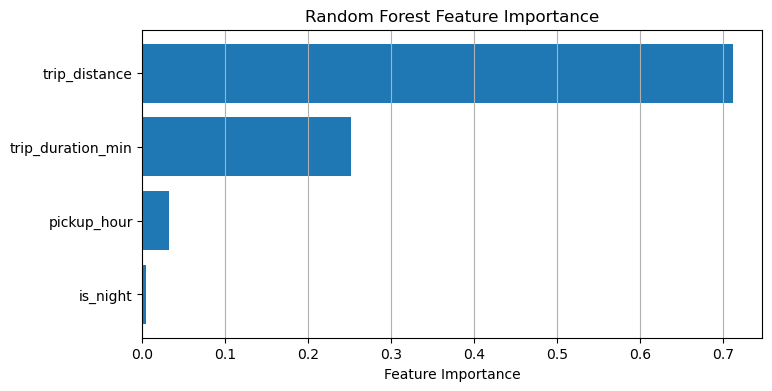

In [64]:
plt.figure(figsize=(8,4))
plt.barh(importances["Feature"], importances["Importance"])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.grid(axis="x")
plt.show()

In [65]:
# =========================================
# STEP 7.1: Define Target and Features
# =========================================

# Target variable (as per Word document)
target = "fare_amount"

# Final feature set (based on Step 6 feature selection)
feature_cols = [
    "trip_distance",
    "trip_duration_min",
    "pickup_hour",
    "is_night",
    "passenger_count"
]

# Create X and y
X = data[feature_cols]
y = data[target]

# Basic sanity checks
print("X shape:", X.shape)
print("y shape:", y.shape)
print("\nMissing values in X:\n", X.isnull().sum())
print("\nMissing values in y:", y.isnull().sum())

X shape: (211889, 5)
y shape: (211889,)

Missing values in X:
 trip_distance        0
trip_duration_min    0
pickup_hour          0
is_night             0
passenger_count      0
dtype: int64

Missing values in y: 0


In [66]:
# =========================================
# STEP 7.2: Train-Test Split
# =========================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Sanity checks
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (169511, 5) (169511,)
Test set size: (42378, 5) (42378,)


In [67]:
# =========================================
# STEP 7.3: Baseline Model - Linear Regression
# =========================================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize model
lr = LinearRegression()

# Train model
lr.fit(X_train, y_train)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluation metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print("Linear Regression Performance")
print("-" * 40)
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE : {test_rmse:.2f}")
print(f"Train MAE : {train_mae:.2f}")
print(f"Test MAE  : {test_mae:.2f}")
print(f"Train R2  : {train_r2:.4f}")
print(f"Test R2   : {test_r2:.4f}")

Linear Regression Performance
----------------------------------------
Train RMSE: 6.38
Test RMSE : 5.50
Train MAE : 2.60
Test MAE  : 2.58
Train R2  : 0.6590
Test R2   : 0.7236


In [68]:
# =========================================
# STEP 7.4: Regularized Linear Models
# Ridge & Lasso Regression
# =========================================

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01)
}

results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_RMSE": train_rmse,
        "Test_RMSE": test_rmse,
        "Train_MAE": train_mae,
        "Test_MAE": test_mae,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Display results
results_df = pd.DataFrame(results)
results_df

,Model,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Train_R2,Test_R2
0,Ridge,6.380757,5.500139,2.600041,2.579822,0.659019,0.723608
1,Lasso,6.380801,5.500304,2.598274,2.578280,0.659014,0.723591


In [69]:
# =========================================
# STEP 7.5: Random Forest Regression (Baseline)
# =========================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train
rf.fit(X_train, y_train)

# Predict
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print("Random Forest Regression Performance")
print("-" * 45)
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE : {test_rmse:.2f}")
print(f"Train MAE : {train_mae:.2f}")
print(f"Test MAE  : {test_mae:.2f}")
print(f"Train R2  : {train_r2:.4f}")
print(f"Test R2   : {test_r2:.4f}")

Random Forest Regression Performance
---------------------------------------------
Train RMSE: 1.96
Test RMSE : 3.87
Train MAE : 0.39
Test MAE  : 1.02
Train R2  : 0.9677
Test R2   : 0.8629


In [70]:
# =========================================
# STEP 7.6: Gradient Boosting Regression (Baseline)
# =========================================

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize Gradient Boosting
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train
gbr.fit(X_train, y_train)

# Predict
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print("Gradient Boosting Regression Performance")
print("-" * 50)
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE : {test_rmse:.2f}")
print(f"Train MAE : {train_mae:.2f}")
print(f"Test MAE  : {test_mae:.2f}")
print(f"Train R2  : {train_r2:.4f}")
print(f"Test R2   : {test_r2:.4f}")

Gradient Boosting Regression Performance
--------------------------------------------------
Train RMSE: 3.78
Test RMSE : 3.35
Train MAE : 1.00
Test MAE  : 1.01
Train R2  : 0.8802
Test R2   : 0.8975


In [ ]:
# =========================================
# STEP 8.1: Hyperparameter Tuning
# Gradient Boosting Regressor
# =========================================

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [2, 3, 4]
}

# Initialize base model
gbr = GradientBoostingRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Extract best model
best_gbr = grid_search.best_estimator_

# Display results
print("Best Hyperparameters:")
print(grid_search.best_params_)

print("\nBest Cross-Validated RMSE:")
print(-grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
# =========================================
# STEP 8.2: Evaluate Tuned Gradient Boosting Model
# =========================================

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions using tuned model
y_train_pred = best_gbr.predict(X_train)
y_test_pred = best_gbr.predict(X_test)

# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print("Tuned Gradient Boosting Performance")
print("-" * 45)
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE : {test_rmse:.2f}")
print(f"Train MAE : {train_mae:.2f}")
print(f"Test MAE  : {test_mae:.2f}")
print(f"Train R2  : {train_r2:.4f}")
print(f"Test R2   : {test_r2:.4f}")

In [ ]:
# =========================================
# STEP 8.4: Save Final Model
# =========================================

from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Recreate the FINAL model (baseline Gradient Boosting)
final_gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Fit on FULL training data
final_gbr.fit(X_train, y_train)

# Save the fitted model
joblib.dump(final_gbr, "gradient_boosting_fare_model.pkl")

print("Fitted Gradient Boosting model saved successfully.")

In [ ]:
# Verify the saved model
import joblib
import os

# Check file exists
file_path = "gradient_boosting_fare_model.pkl"
if os.path.exists(file_path):
    print(f"Model file exists: {file_path}")
    print(f"File size: {os.path.getsize(file_path) / 1024:.2f} KB")
    
    # Load and verify
    loaded_model = joblib.load(file_path)
    print(f"\nModel loaded successfully!")
    print(f"Number of features: {loaded_model.n_features_in_}")
    print(f"\nFeature importances:")
    feature_names = ["trip_distance", "trip_duration_min", "pickup_hour", "is_night", "passenger_count"]
    for name, importance in zip(feature_names, loaded_model.feature_importances_):
        print(f"  {name}: {importance:.4f}")
else:
    print(f"Model file not found: {file_path}")